In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 100
df = import_data(grid_size)

# Cross-validation over all data

In [3]:
# number of holdouts
sim_num = 100

In [4]:
# only run if you need to recalculate the bootstrapped validation results
# regressions(df, cities, sim_num, grid_size, do_par = False)

In [5]:
# import data
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
loss = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
loss = loss.dropna()

In [7]:
loss = loss.replace({'diurnal':'day\n(mean)','diurnalmax':'day\n(max)','nocturnal':'night\n(mean)','nocturnalmax':'night\n(max)'})

<Figure size 504.567x311.84 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


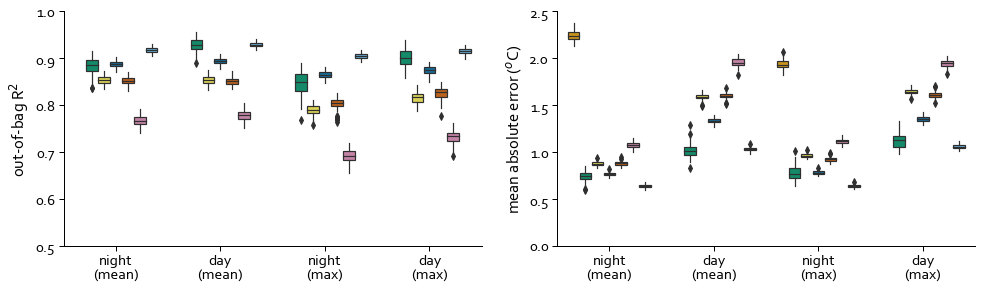

model                        average       cnn       gam      gbrt      mars  \
error_metric time_of_day                                                       
mae          day\n(max)     3.591428  1.120450  1.641819  1.350920  1.605424   
             day\n(mean)    4.033679  1.013967  1.586763  1.330204  1.598767   
             night\n(max)   1.931800  0.776506  0.957607  0.778825  0.919222   
             night\n(mean)  2.237787  0.740599  0.871729  0.764629  0.875119   
r2           day\n(max)    -0.001150  0.900376  0.814969  0.873499  0.824116   
             day\n(mean)   -0.001162  0.927989  0.853082  0.893940  0.850328   
             night\n(max)  -0.001059  0.847288  0.789429  0.864182  0.803530   
             night\n(mean) -0.001101  0.883099  0.853283  0.887044  0.851231   

model                            mlr        rf  
error_metric time_of_day                        
mae          day\n(max)     1.944791  1.057552  
             day\n(mean)    1.953725  1.029455  
   

<Figure size 432x288 with 0 Axes>

In [8]:
plot_holdouts(loss, grid_size)